# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, Friday, May 2 at 11 – 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/teams/Course_2252_data_3402_001-NLyiqHJ5btv8Y/Shared%20Documents/General/Kaggle%20Tabular%20Datasets.xlsx?d=w34cdd3378d1146a2ab63700189a8c5b5&csf=1&web=1&e=6ASD5s). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.


#### Project Link:
[Playground Series - Season 4, Episode 1](https://www.kaggle.com/competitions/playground-series-s4e1)

#### Challenge Description:
This classification task involves predicting whether a bank customer will close their account ("Exited" = 1) based on customer demographics and banking activity such as credit score, age, balance, and tenure. This problem mimics real-world churn prediction in the financial services industry.

#### Dataset Description:
The dataset includes the following:
- **Numerical features**: CreditScore, Age, Balance, Tenure, etc.
- **Categorical features**: Geography, Gender
- **Target variable**: Exited (1 = closed account, 0 = retained)
- The training set includes a labeled column for model training, while the test set is used to submit predictions to Kaggle.

## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [2]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("- Number of rows (data points):", train_df.shape[0])
print("- Number of features (including target):", train_df.shape[1])

# Check for missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0]
print("\n- Missing values:")
print(missing if not missing.empty else "No missing values found.")

# Create feature summary table
summary = []
for col in train_df.columns:
    dtype = "Categorical" if train_df[col].dtype == "object" else "Numerical"
    if dtype == "Categorical":
        values = ", ".join(map(str, train_df[col].unique()[:5])) + ("..." if train_df[col].nunique() > 5 else "")
    else:
        values = f"{train_df[col].min()} to {train_df[col].max()}"
    summary.append({
        "Feature": col,
        "Type": dtype,
        "Values / Range": values,
        "Missing Values": train_df[col].isnull().sum()
    })

summary_df = pd.DataFrame(summary)
print("\n - Feature Summary Table:")
display(summary_df)

# Detect outliers using IQR method
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

print("\n - Outlier Count (IQR method):")
outliers = {col: detect_outliers(train_df[col]) 
            for col in train_df.select_dtypes(include=["int64", "float64"]).columns 
            if col != "Exited"}
print(pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier Count']))

# Outlier definition
print("\n - Outlier definition: An outlier is a value that lies beyond 1.5×IQR from the lower (Q1) or upper (Q3) quartile.")

# Class imbalance check
print("\n - Target class distribution (Exited):")
target_counts = train_df["Exited"].value_counts()
print(target_counts)
print("Class percentage:\n", (target_counts / target_counts.sum()) * 100)

# Target info
print("\n-  Target variable: 'Exited'")
print("Type: Classification")
print("Encoded as: 0 = Not Exited, 1 = Exited")


- Number of rows (data points): 165034
- Number of features (including target): 14

- Missing values:
No missing values found.

 - Feature Summary Table:


,Feature,Type,Values / Range,Missing Values
0,id,Numerical,0 to 165033,0
1,CustomerId,Numerical,15565701 to 15815690,0
2,Surname,Categorical,"Okwudilichukwu, Okwudiliolisa, Hsueh, Kao, Chi...",0
3,CreditScore,Numerical,350 to 850,0
4,Geography,Categorical,"France, Spain, Germany",0
5,Gender,Categorical,"Male, Female",0
6,Age,Numerical,18.0 to 92.0,0
7,Tenure,Numerical,0 to 10,0
8,Balance,Numerical,0.0 to 250898.09,0
9,NumOfProducts,Numerical,1 to 4,0



 - Outlier Count (IQR method):
                 Outlier Count
id                           0
CustomerId                   0
CreditScore                253
Age                       6394
Tenure                       0
Balance                      0
NumOfProducts              475
HasCrCard                40606
IsActiveMember               0
EstimatedSalary              0

 - Outlier definition: An outlier is a value that lies beyond 1.5×IQR from the lower (Q1) or upper (Q3) quartile.

 - Target class distribution (Exited):
Exited
0    130113
1     34921
Name: count, dtype: int64
Class percentage:
 Exited
0    78.840118
1    21.159882
Name: count, dtype: float64

-  Target variable: 'Exited'
Type: Classification
Encoded as: 0 = Not Exited, 1 = Exited


## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

🔹 Numerical Feature Distributions by Class (Exited):


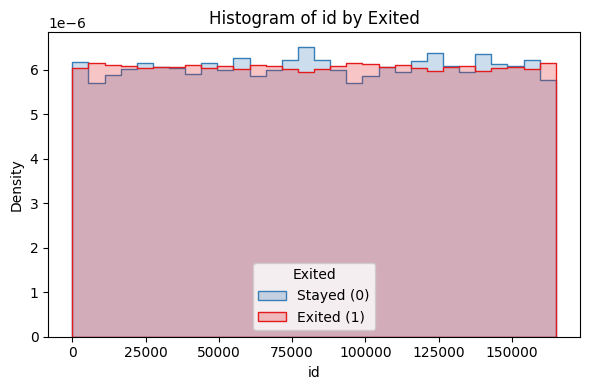

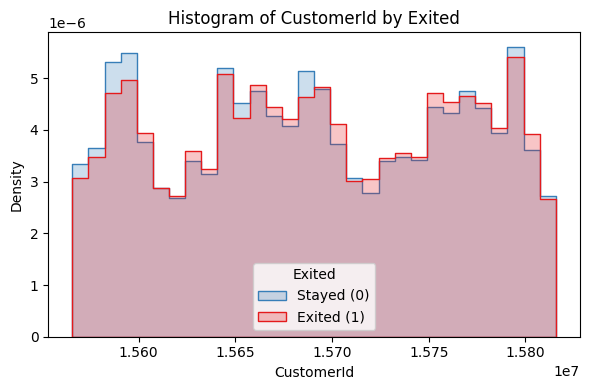

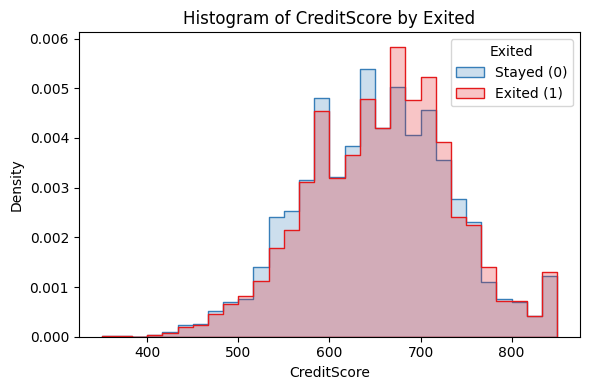

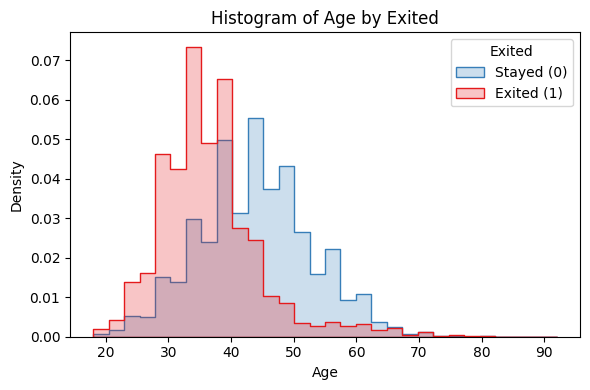

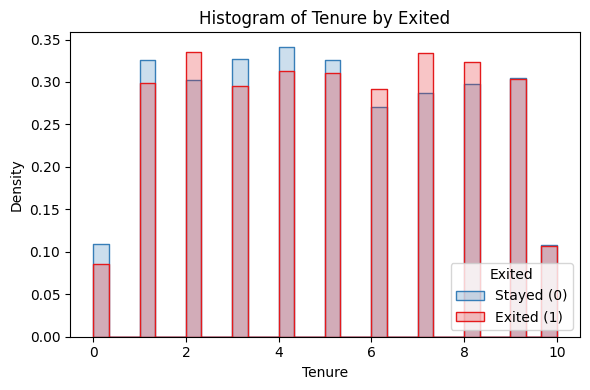

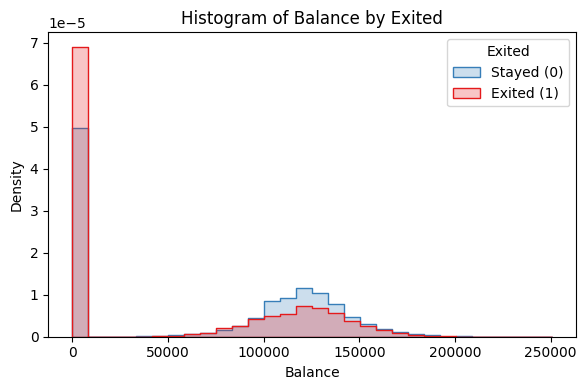

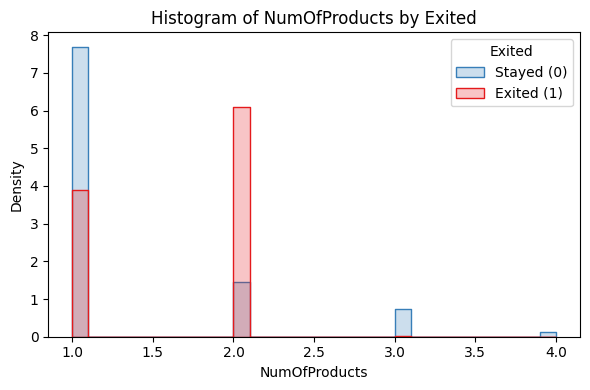

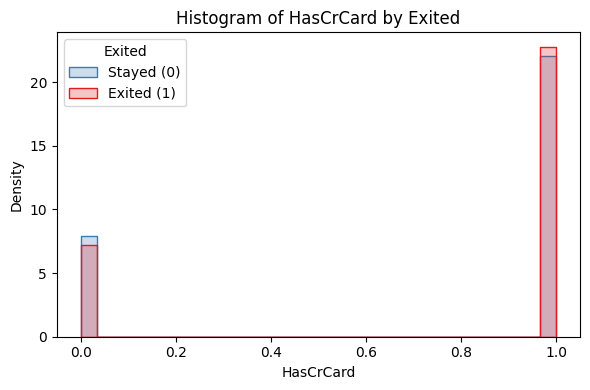

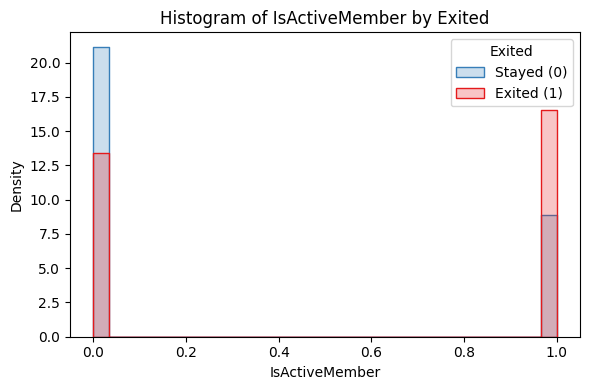

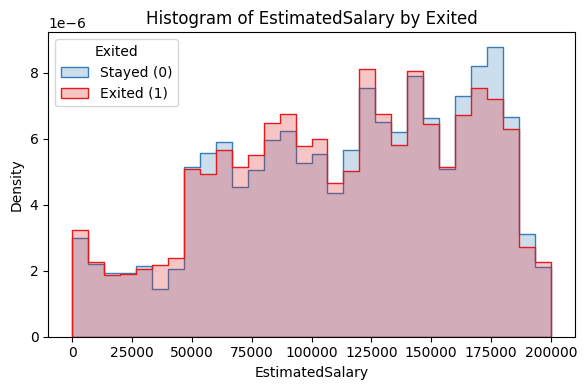

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical and categorical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove("Exited")  # remove target

categorical_features = train_df.select_dtypes(include='object').columns.tolist()

# Plot histograms for numerical features grouped by class (Exited)
print("🔹 Numerical Feature Distributions by Class (Exited):")

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=train_df, x=feature, hue="Exited", kde=False, bins=30, palette="Set1", element="step", stat="density", common_norm=False)
    plt.title(f"Histogram of {feature} by Exited")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title="Exited", labels=["Stayed (0)", "Exited (1)"])
    plt.tight_layout()
    plt.show()


🔹 Categorical Feature Distributions by Class (Exited):

Surname distribution (%):


,Stayed (0),Exited (1)
Surname,,
Abazu,100.00,0.00
Abbie,75.00,25.00
Abbott,87.50,12.50
Abdullah,100.00,0.00
Abdulov,75.00,25.00
...,...,...
Zubarev,85.71,14.29
Zubareva,100.00,0.00
Zuev,84.21,15.79


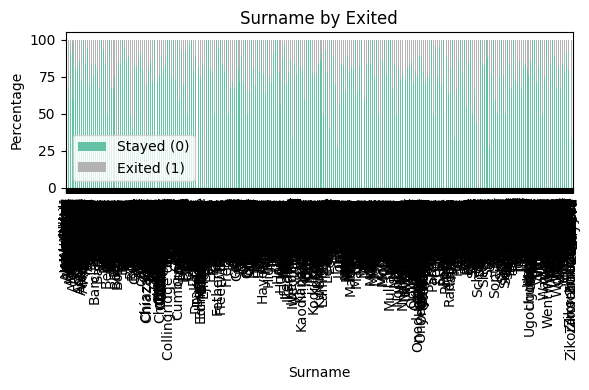


Geography distribution (%):


,Stayed (0),Exited (1)
Geography,,
France,83.47,16.53
Germany,62.10,37.90
Spain,82.78,17.22


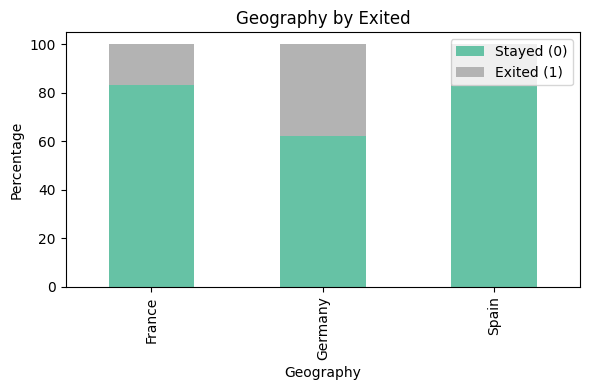


Gender distribution (%):


,Stayed (0),Exited (1)
Gender,,
Female,72.03,27.97
Male,84.09,15.91


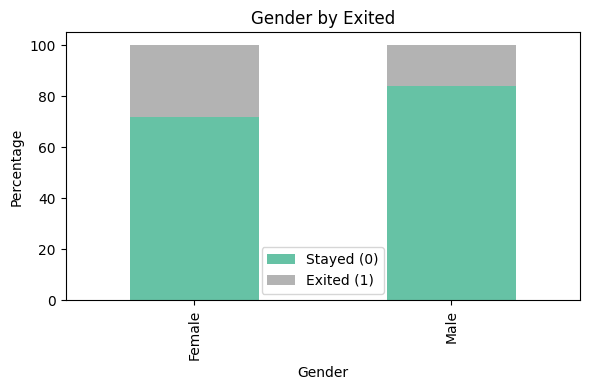

In [4]:
print("🔹 Categorical Feature Distributions by Class (Exited):")

for feature in categorical_features:
    ctab = pd.crosstab(train_df[feature], train_df["Exited"], normalize="index") * 100
    ctab.columns = ["Stayed (0)", "Exited (1)"]
    print(f"\n{feature} distribution (%):")
    display(ctab.round(2))

    # Optional: bar plot
    ctab.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
    plt.title(f"{feature} by Exited")
    plt.ylabel("Percentage")
    plt.tight_layout()
    plt.show()


## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [6]:
# Drop unnecessary columns
X = train_df.drop(columns=["id", "CustomerId", "Surname", "Exited"])
y = train_df["Exited"]

X_test_final = test_df.drop(columns=["id", "CustomerId", "Surname"])


In [7]:
# Identify feature types
categorical_cols = ["Gender", "Geography"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])


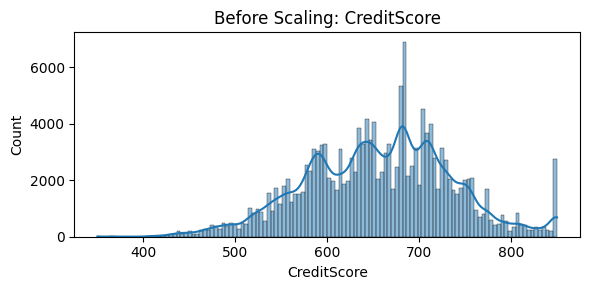

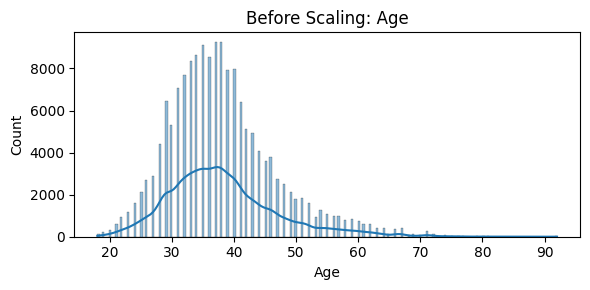

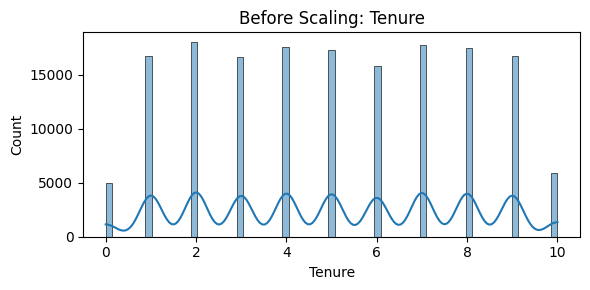

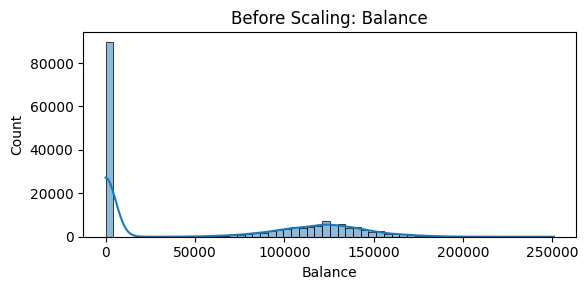

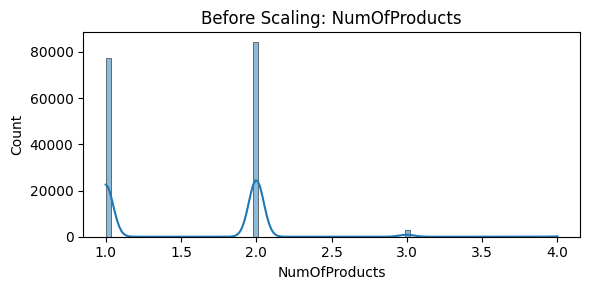

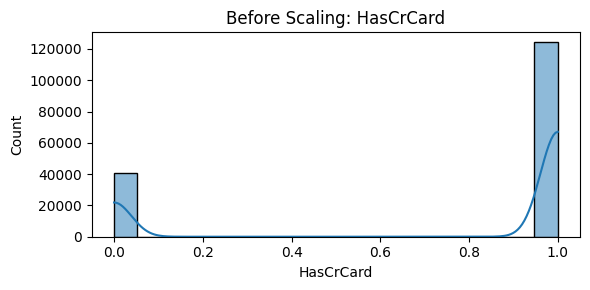

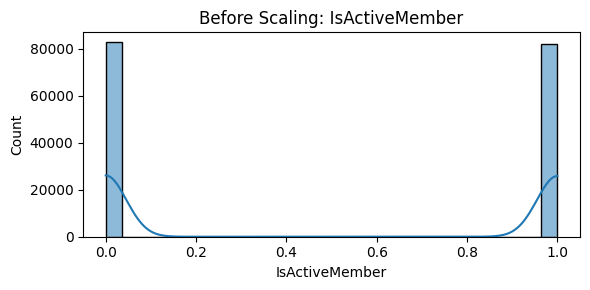

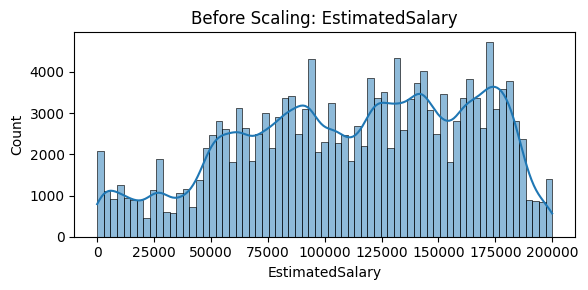

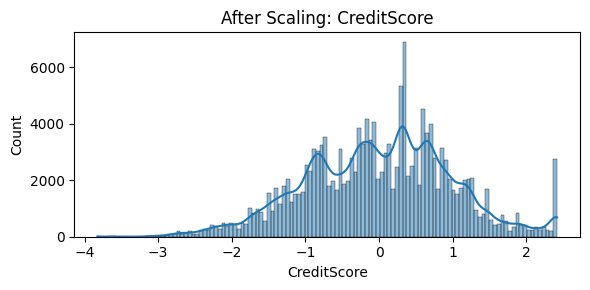

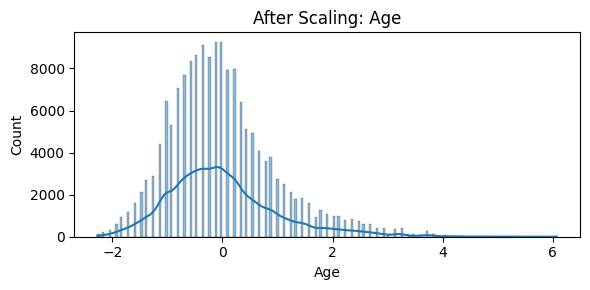

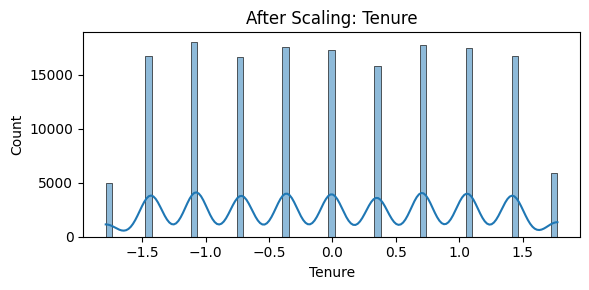

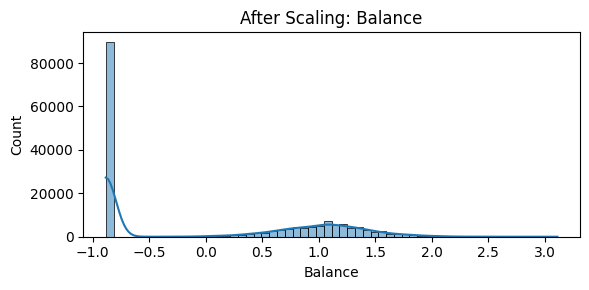

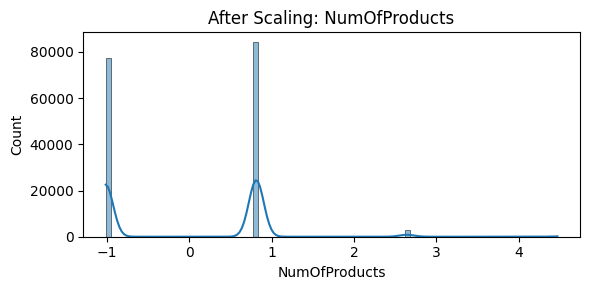

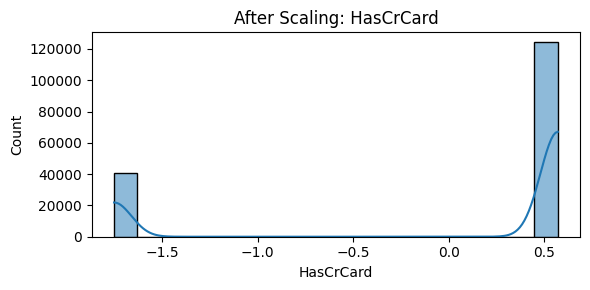

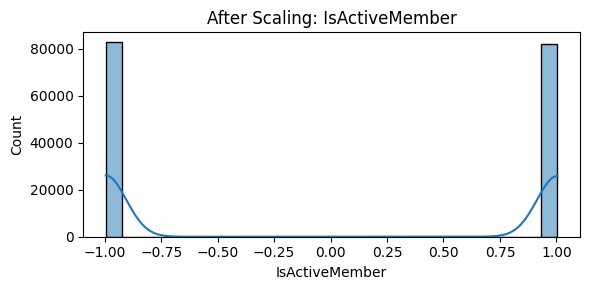

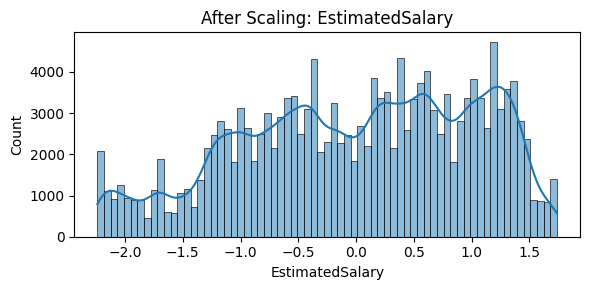

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before scaling
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(X[col], kde=True)
    plt.title(f"Before Scaling: {col}")
    plt.tight_layout()
    plt.show()

# After scaling
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(X_scaled[col], kde=True)
    plt.title(f"After Scaling: {col}")
    plt.tight_layout()
    plt.show()


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


### Feature Insights for ML:

- **Age** shows a clear shift: customers who exited tend to be older than those who stayed.
- **Balance** shows some separation: customers with zero balance are more likely to stay.
- **NumOfProducts** and **IsActiveMember** show visible differences in class histograms.
- **Geography** and **Gender** show slight but consistent trends in class proportions.

These features (Age, Balance, NumOfProducts, IsActiveMember) appear most promising for classification.



## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


🔹 Accuracy on validation set: 0.8567562108664916

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     19504
           1       0.72      0.54      0.61      5251

    accuracy                           0.86     24755
   macro avg       0.80      0.74      0.76     24755
weighted avg       0.85      0.86      0.85     24755



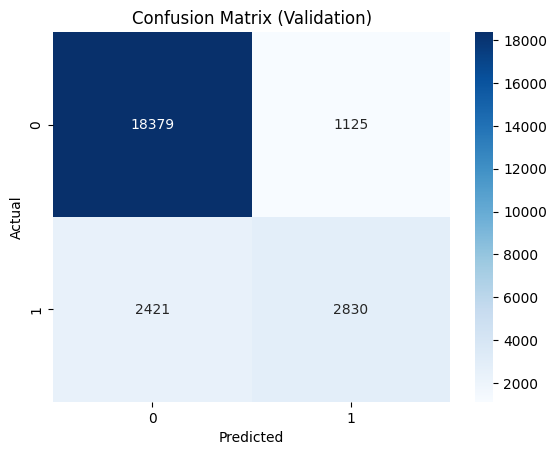

✅ submission.csv file created.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Problem Formulation ---

# Drop identifiers from train and test
X = train_df.drop(columns=["id", "CustomerId", "Surname", "Exited"])
y = train_df["Exited"]
X_test_final = test_df.drop(columns=["id", "CustomerId", "Surname"])
test_ids = test_df["id"]

# Define categorical and numerical columns
categorical_cols = ["Geography", "Gender"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Combine preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split train data into train/val/test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluation
print("🔹 Accuracy on validation set:", accuracy_score(y_val, y_val_pred))
print("\n🔹 Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Apply to Kaggle Test Set and Save Submission ---

# Predict on test.csv
test_predictions = model.predict(X_test_final)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_ids,
    "Exited": test_predictions
})

# Save to CSV for Kaggle submission
submission_df.to_csv("submission.csv", index=False)
print("✅ submission.csv file created.")
